Transaction Fraud Detection
https://www.kaggle.com/code/anishvijan/transaction-fraud-detection/notebook

Blocker Fraud Company

The Blocker Fraud Company is a company specialized in detecting fraud in financial transactions made through mobile devices. The company has a service called “Blocker Fraud” with no guarantee of blocking fraudulent transactions.

And the business model of the company is of the Service type with the monetization made by the performance of the service provided, that is, the user pays a fixed fee on the success in detecting fraud in the customer's transactions.
Expansion Problem

Blocker Fraud Company is expanding in Brazil and to acquire customers more quickly, it has adopted a very aggressive strategy. The strategy works as follows:

The company will receive 25% of the value of each transaction that is truly detected as fraud. The company will receive 5% of the value of each transaction detected as fraud, but the transaction is truly legitimate. The company will return 100% of the value to the customer, for each transaction detected as legitimate, however the transaction is truly a fraud. 
i.ii The Challenge You need to deliver to the CEO of Blocker Fraud Company a production model in which your access will be done via API, that is, customers will send their transactions via API so that your model classifies them as fraudulent or legitimate.

Business Questions

What is the model's Precision and Accuracy?
How Reliable is the model in classifying transactions as legitimate or fraudulent?
What is the Expected Billing by the Company if we classify 100% of transactions with the model?
What is the Loss Expected by the Company in case of model failure?
What is the Profit Expected by the Blocker Fraud Company when using the model?
Business Assumptions

Fraud prevention is the implementation of a strategy to detect fraudulent transactions or banking actions and prevent these actions from causing financial damage and the reputation of the client and the financial institution.

There are always financial frauds and They can happen through virtual and physical ways. So the investment in security has been increasing.

The losses caused by fraud can reach R$ 1 billion - which corresponds to half the amount that institutions invest in technology systems aimed at information security every year, according to Febraban's 2020 Banking Technology Survey.
Solution Strategy

My solution to solve this problem will be the development of a data science project. This project will have a machine learning model which can predict whether a transaction is fraudulent or not.
1. Data Description:

In this first section the data will be collected and studied. The missing values will be threated or removed. Finally, a initial data description will carried out to know the data. Therefore some calculations of descriptive statistics will be made, such as kurtosis, skewness, media, fashion, median and standard desviation.
2. Feature Engineering:

In this section, a mind map will be created to assist the creation of the hypothesis and the creation of new features. These assumptions will help in exploratory data analysis and may improve the model scores.
3. Data Filtering:

Data filtering is used to remove columns or rows that are not part of the business. For example, columns with customer ID, hash code or rows with age that does not consist of human age.
4. Exploratory Data Analysis:

The exploratory data analysis section consists of univariate analysis, bivariate analysis and multivariate analysis to assist in understanding of the database. The hypothesis created in step 02 will be tested in the bivariate analysis.
5. Data Preparation:

In this fifth section, the data will be prepared for machine learning modeling. Therefore, they will be transformed to improve the learning of the machine learning model, thus they can be encoded, oversampled, subsampled or rescaled.
6. Feature Selection:

After the data preparation in this section algorithms, like Boruta, will select the best columns to be used for the training of the machine learning model. This reduces the dimensionality of the database and decreases the chances of overfiting.
7. Machine Learning Modeling:¶

Aims to train the machine learning algorithms and how they can predict the data. For validation the model is trained, validated and applied to cross validation to know the learning capacity of the model.
8. Hyparameter Fine Tuning:

Firstly selected the best model to be applied in the project, it's important to make a fine tuning of the parameters to improve its scores. The same model performance methods apllied in the step 07 are used.
9. Conclusions:

This is a conclusion stage which the generation capacity model is tested using unseen data. In addition, some business questions are answered to show the applicability of the model in the business context.
10. Model Deploy:

This is the final step of the data science project. So, in this step the flask api is created and the model and the functions are saved to be implemented in the api.


### 1. Import Librairies and Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Importing Data¶
Context

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.
Content

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

CASH-IN: Refers to depositing cash into an account, typically adding funds.

CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

DEBIT: This can have two meanings:

It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

In accounting, it represents an entry that reduces assets or increases liabilities.

PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.


In [6]:
data = pd.read_csv('PS_2017_log.csv')

### 2. EDA - exploring the data

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
data.shape

(6362620, 11)

In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:

# Drop any duplicates
data.drop_duplicates(inplace=True)
#Check data again, after dropping duplicates
data.shape

(6362620, 11)

In [11]:

# check for missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
data.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
#describe and count values
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


### 3. EDA - analysis

<Axes: xlabel='count', ylabel='isFraud'>

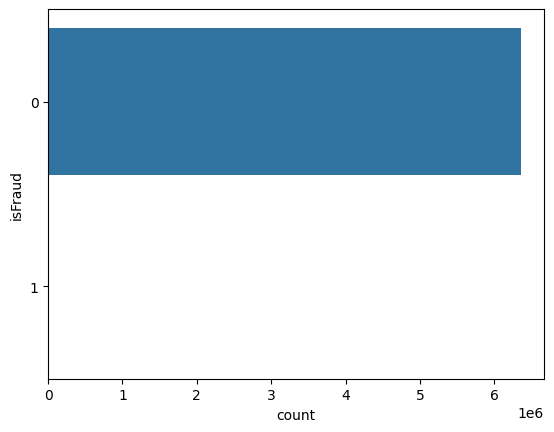

In [15]:
sns.countplot(data = data, y="isFraud")

In [16]:
# Group by 'isFraud' and sum the 'amount'
amount_fraud = data.groupby("isFraud")["amount"].sum().reset_index()

# Format the 'amount' column
amount_fraud['amount'] = amount_fraud['amount'].apply(lambda x: f"{x:,.2f}")

amount_fraud

,isFraud,amount
0,0,"1,132,336,529,331.93"
1,1,"12,056,415,427.84"


Text(0.5, 1.0, 'Total Amount by Fraud')

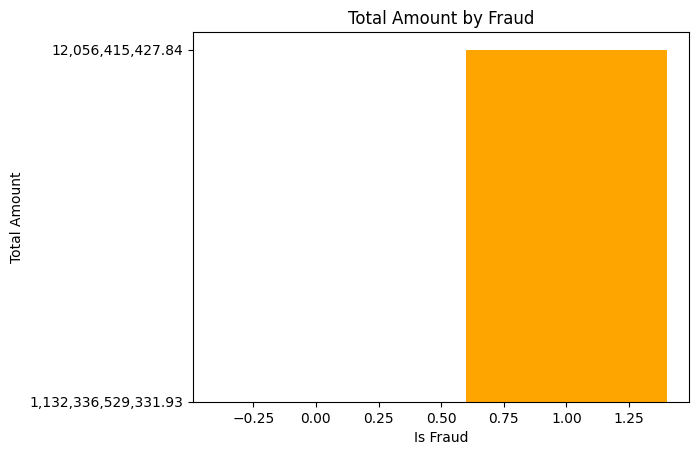

In [17]:
colors = ["turquoise", "orange"]
plt.bar(amount_fraud["isFraud"], amount_fraud["amount"], color=colors)
plt.xlabel("Is Fraud")
plt.ylabel("Total Amount")
plt.title('Total Amount by Fraud')
# plt.xticks(amount_fraud['isFraud'])

In [18]:
# Type of transaction
transaction_fraud = data.groupby("type")["isFraud"].sum().reset_index()
transaction_fraud

,type,isFraud
0,CASH_IN,0
1,CASH_OUT,4116
2,DEBIT,0
3,PAYMENT,0
4,TRANSFER,4097


Text(0.5, 1.0, 'Transaction Type vs Total Frauds')

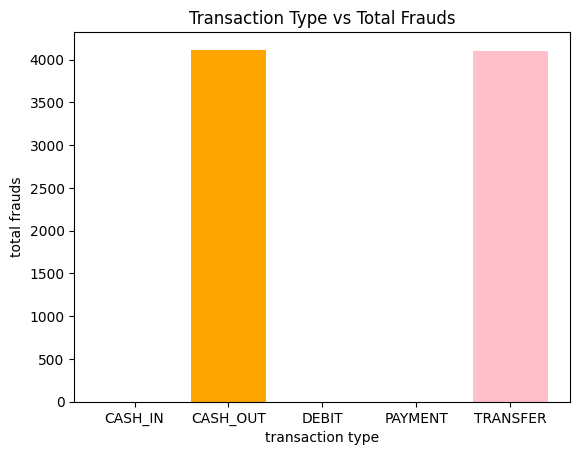

In [19]:
colors = colors = ["turquoise", "orange", "blue", "yellow", "pink"]
plt.bar(transaction_fraud["type"], transaction_fraud["isFraud"], color=colors)
plt.xlabel("transaction type")
plt.ylabel("total frauds")
plt.title("Transaction Type vs Total Frauds")
# plt.xticks(transaction_fraud["type"])

In [20]:
fraud_type_amount = data.groupby(["isFraud", "type"])["amount"].sum().reset_index()
fraud_type_amount['amount'] = fraud_type_amount['amount'].apply(lambda x: f"$ {x:,.2f}")
fraud_type_amount

,isFraud,type,amount
0,0,CASH_IN,"$ 236,367,391,912.46"
1,0,CASH_OUT,"$ 388,423,792,980.66"
2,0,DEBIT,"$ 227,199,221.28"
3,0,PAYMENT,"$ 28,093,371,138.37"
4,0,TRANSFER,"$ 479,224,774,079.16"
5,1,CASH_OUT,"$ 5,989,202,243.83"
6,1,TRANSFER,"$ 6,067,213,184.01"


Text(0.5, 1.0, 'Transaction Type vs Total Frauds')

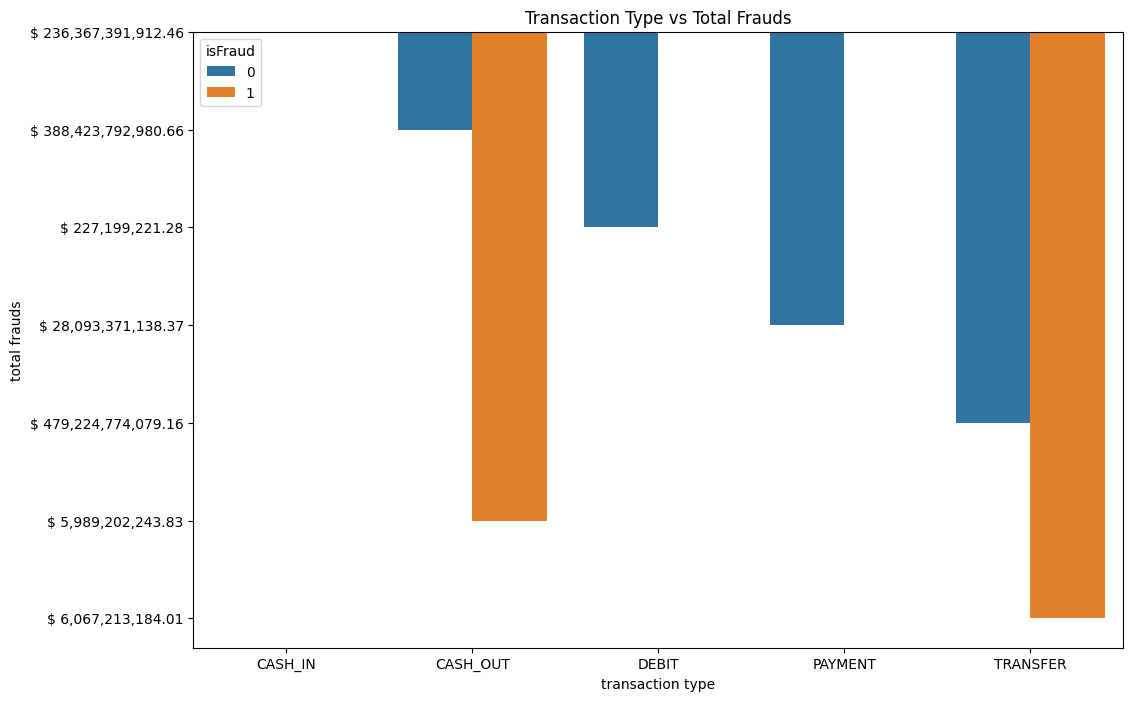

In [21]:
# visualize transaction types where there is fraud
plt.figure(figsize=(12, 8))
sns.barplot(data = fraud_type_amount, x="type", y="amount", hue="isFraud")
plt.xlabel("transaction type")
plt.ylabel("total frauds")
plt.title("Transaction Type vs Total Frauds")

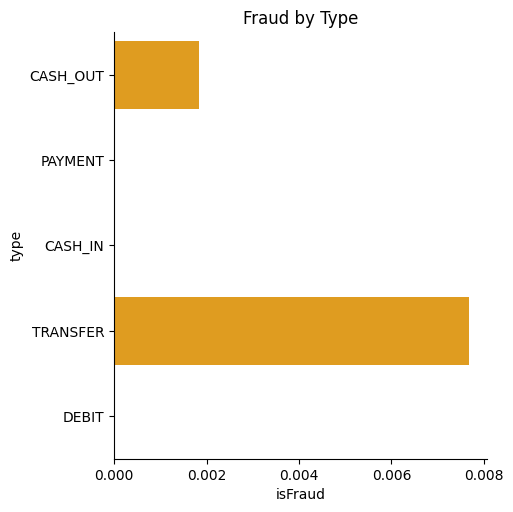

In [22]:
# Bar chart 'isFraud by type'

sns.catplot(x="isFraud", 
            y="type", 
            data=data, 
            kind="bar", 
            color="orange", 
            errorbar=None,
            order=data["type"].value_counts().index
            )
plt.title('Fraud by Type')


# Show the plot
plt.show()

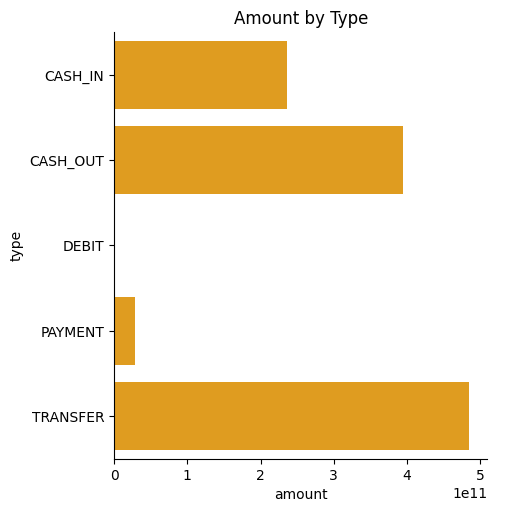

In [23]:
# Visualization of Data : amount per type
# Grouping data by 'type' and sum 'amount' for the bar plot
data_grouped = data.groupby('type')['amount'].sum().reset_index()

# Visualization of Data: amount per type
sns.catplot(x="amount",
            y="type",
            data=data_grouped, 
            kind="bar",
            color="orange", 
            errorbar=None
            )
plt.title('Amount by Type')
plt.show()

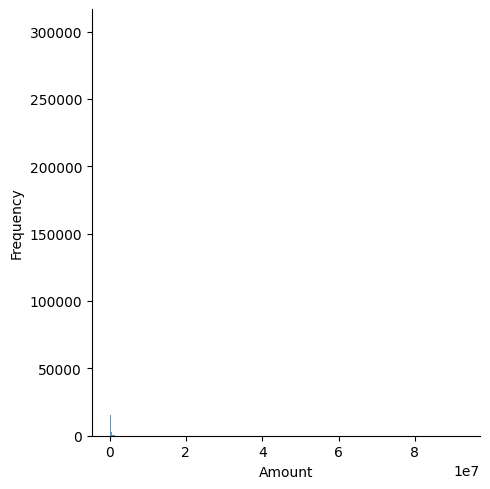

In [24]:
# Create the distribution plot for Amount
g = sns.displot(data["amount"])

# Set the axes labels
g.set_axis_labels("Amount", "Frequency")

# Show the plot
plt.show()

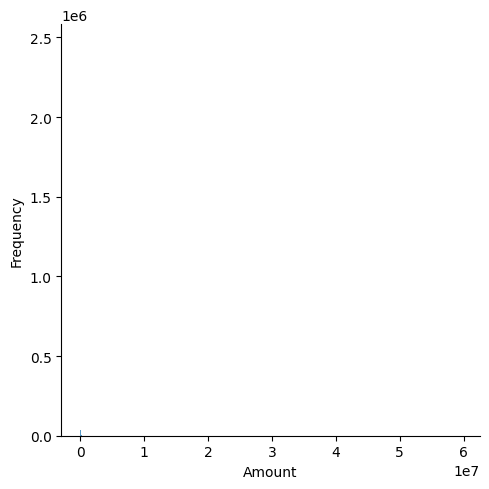

In [25]:
# Create the distribution plot for Old Balance
go = sns.displot(data["oldbalanceOrg"])

# Set the axes labels
go.set_axis_labels("Amount", "Frequency")

# Show the plot
plt.show()

#### Heat map

<Axes: >

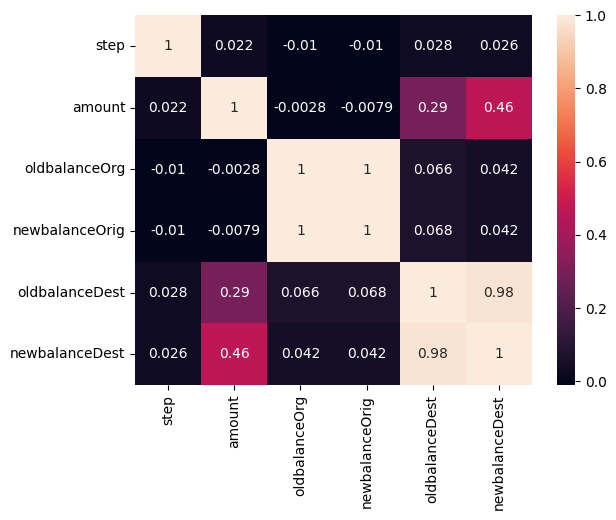

In [26]:


correlation = data[['step',
                    'amount', 
                    'oldbalanceOrg', 
                    'newbalanceOrig', 
                    'oldbalanceDest', 
                    'newbalanceDest']
                   ].corr()

sns.heatmap(data=correlation, annot=True)


### 4. Analysis

In [27]:
# Determine X and y
X = data[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']]
y = data["isFraud"]

#### Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)


In [29]:
X_test.reset_index(inplace=True, drop=True)
X_test

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,279,CASH_IN,91774.33,255216.48,346990.81,965411.27,873636.94
1,187,TRANSFER,770776.85,16059.00,0.00,159759.21,930536.07
2,334,PAYMENT,28974.82,1303.00,0.00,0.00,0.00
3,153,CASH_OUT,66649.54,0.00,0.00,107703.23,174352.76
4,23,PAYMENT,15380.51,814.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
1272519,283,CASH_IN,257107.22,9155231.32,9412338.54,492096.04,234988.81
1272520,311,PAYMENT,18231.25,70451.00,52219.75,0.00,0.00
1272521,249,CASH_IN,296303.04,5382736.22,5679039.26,433732.53,137429.49
1272522,540,TRANSFER,382341.59,0.00,0.00,1317549.63,1699891.23


In [30]:
X_train["type"].nunique()

5

In [31]:
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[["type"]])

In [32]:
X_train_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
ohe.get_feature_names_out()

array(['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'], dtype=object)

In [34]:
train_encoded_df = pd.DataFrame(X_train_ohe.toarray(), columns=ohe.get_feature_names_out())

In [35]:
train_encoded_df

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
5090091,0.0,1.0,0.0,0.0,0.0
5090092,0.0,0.0,0.0,1.0,0.0
5090093,1.0,0.0,0.0,0.0,0.0
5090094,0.0,1.0,0.0,0.0,0.0


In [36]:
train_encoded_df.shape

(5090096, 5)

In [37]:
X_test_ohe = ohe.transform(X_test[['type']])

In [38]:
test_encoded_df = pd.DataFrame(X_test_ohe.toarray(), columns=ohe.get_feature_names_out())

In [39]:
X_train = pd.concat([X_train.drop("type", axis=1), train_encoded_df], axis=1)

In [40]:
X_train.shape

(6108073, 11)

In [41]:
X_test = pd.concat([X_test.drop("type", axis=1), test_encoded_df], axis=1)
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,279,91774.33,255216.48,346990.81,965411.27,873636.94,1.0,0.0,0.0,0.0,0.0
1,187,770776.85,16059.00,0.00,159759.21,930536.07,0.0,0.0,0.0,0.0,1.0
2,334,28974.82,1303.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0
3,153,66649.54,0.00,0.00,107703.23,174352.76,0.0,1.0,0.0,0.0,0.0
4,23,15380.51,814.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1272519,283,257107.22,9155231.32,9412338.54,492096.04,234988.81,1.0,0.0,0.0,0.0,0.0
1272520,311,18231.25,70451.00,52219.75,0.00,0.00,0.0,0.0,0.0,1.0,0.0
1272521,249,296303.04,5382736.22,5679039.26,433732.53,137429.49,1.0,0.0,0.0,0.0,0.0
1272522,540,382341.59,0.00,0.00,1317549.63,1699891.23,0.0,0.0,0.0,0.0,1.0


#### Model Selection

In [42]:
print(X_train.isnull().sum())  # Check for missing values in features
print(y_train.isnull().sum())   # Check for missing values in target

step              1017977
amount            1017977
oldbalanceOrg     1017977
newbalanceOrig    1017977
oldbalanceDest    1017977
newbalanceDest    1017977
type_CASH_IN      1017977
type_CASH_OUT     1017977
type_DEBIT        1017977
type_PAYMENT      1017977
type_TRANSFER     1017977
dtype: int64
0


In [43]:
# Remove rows with missing values in features
X_train = X_train.dropna()
# Ensure to drop corresponding rows in y_train
y_train = y_train[X_train.index]

##### Logistic regression

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
accuracy_score(y_test, lr.predict(X_test))

0.998791378394435

In [46]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.56      0.32      0.41      1643

    accuracy                           1.00   1272524
   macro avg       0.78      0.66      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524



##### Decision Tree

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
accuracy_score(y_test, dtc.predict(X_test))

0.9995599297144887

In [49]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.87      0.77      0.82      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.89      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



##### Random Forest

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, rfc.predict(X_test))

In [ ]:
print(classification_report(y_test, rfc.predict(X_test)))